# **Анализ данных "Boston" и построение модели стоимости домов**

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston
data_boston = load_boston()

In [3]:
df = pd.DataFrame(data_boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Выведем описание данных
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Обработаем полученные данные

In [5]:
#Подставим названия столбцов из аттрибутов данных

df.columns = data_boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Добавим колонку средней цены дома

df['MEDV'] = data_boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM - Уровень преступности на душу населения по городам
* ZN - Доля земли под жилую застройку зонирована под участки площадью более 25 000 кв.м
* INDUS - Доля акров неторгового бизнеса на город
* CHAS - Фиктивная переменная Charles River (= 1, если участок граничит с рекой; 0 в противном случае)
* NOX - Концентрация оксидов азота (частей на 10 миллионов)
* RM - Среднее количество комнат в жилом помещении
* AGE - Доля квартир, занимаемых владельцами, построенных до 1940 г
* DIS - Взвешивает расстояния до пяти центров занятости Бостона
* RAD - Индекс доступности к радиальным магистралям
* TAX - Полная ставка налога на имущество за 10 000 долларов США
* PTRATIO - Соотношение учеников и учителей по городам
* B - 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам
* LSTAT - %более низкий статус населения
* MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов

In [7]:
#Выведем основные данные о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Как можно увидеть, все признаки являются числовыми в формате float

In [8]:
#Посчитаем количество пустых значений
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пустых значений нет

In [9]:
#Статитистические данные о признаках
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Отсюда мы можем увидеть, что средняя цена всех домов в Бостоне - приблизительн 22000, при этом самый дешевый дом имеет цену 5000, а самый дорогой 50000 долларов.

# **Визуализация данных**

In [10]:
#Выведем корреляцию признаков
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(10.049999999999997, 0.5, 'Количество домов')

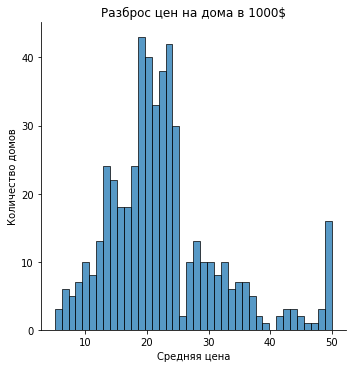

In [12]:
#Построим график расброса цен на дома
sns.displot(df['MEDV'], bins=40)
plt.title('Разброс цен на дома в 1000$')
plt.xlabel('Средняя цена')
plt.ylabel('Количество домов')

Увидим, что данные о цене имеют нормальное распределение, но также есть несколько выбросов в районе 25-26 и 50 тысяч долларов.

Text(0.5, 1.0, 'Корреляция признаков')

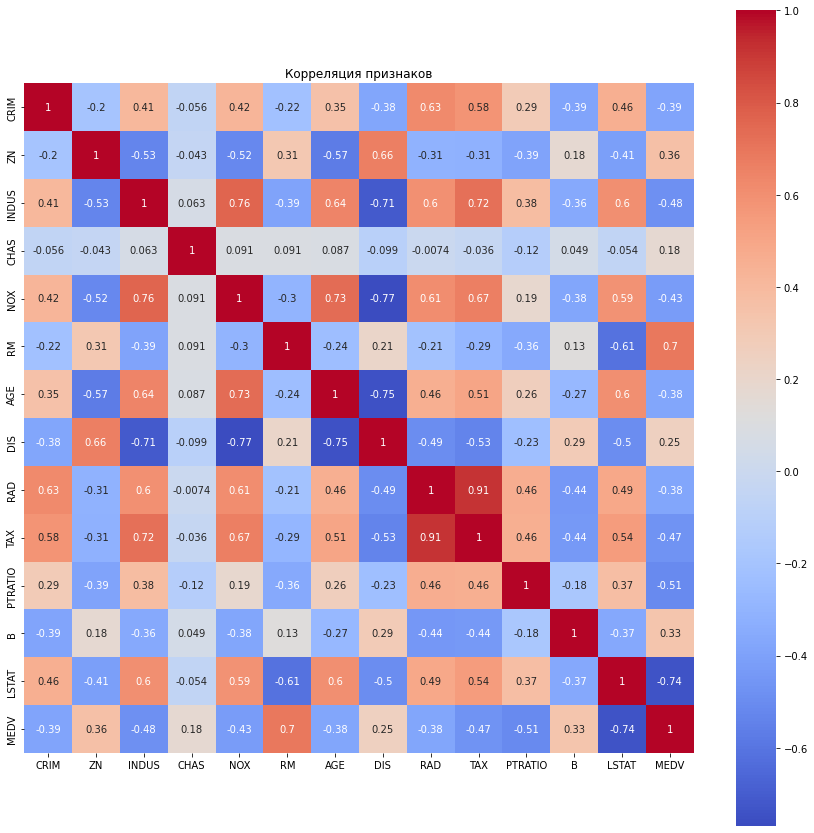

In [13]:
#Построим матрицу корреляцию признаков
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Корреляция признаков')

Коэффициент корреляции находится в диапазоне от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда он близок к -1, переменные имеют сильную отрицательную корреляцию.
#### Вывод:
* Наиболее сильно влиет на цену дома - количество комнат(RM) и процент населения района(LSTAT)
* Также можем увидить сильную корреляцию между двуми признаками - индекс доступности к радиальным магистралям (RAD) и налог на имущество (TAX); доля акров производственных предприятий (INDUS) и концетрация оксида азота (NOX) и обратная к ним расстояние до центров занятости (NOX) 
* Если обобщить то почти все признаки достаточно сильно коррелируют друг с другом, что создаёт мультиколинеарность, это значит мы не сможем эффективно использовать линейную регрессию для точного предсказания

In [14]:
#Корреляция признаков по отношению к цене
corrmat = df.corr()
corrmat.sort_values(by=['MEDV'], ascending=False)[['MEDV']]

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


# Построение моделей для предсказания

In [15]:
#Отделяем целевую переменную от признаков
X = df.drop(['MEDV'],axis=1)
Y = df['MEDV']

In [16]:
#Разделяем данные на тестовые и тренировочные в отношение 30 на 70
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=8)

#### Обучим несколько моделей для дальнейшего объединения в ансамбли, но в основном сделаем упор на градиентный бустинг, он хорошо подходит для решения задач предсказания.

In [17]:
!pip install xgboost

In [18]:
#Подключаем необходимые модели
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import Ridge

#### Перед переходом к обучению изменим метод оценки моделей, применим метод кросс-валидацие, для предотращения переобучения
+ 1.Разделим данные на несколько частей
+ 2.Первая часть будет являться валидационной
+ 3.Модель обучается на всех данных, кроме валидационной
+ 4.Первые три шага повторяются, но на втором берётся не первая, а вторая, на втором - третья и так далее
+ 5.Усредним результаты оценки

In [19]:
#Количество наших шагов
n_folds = 5

#Функция оценки
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Также используем помимо гиперпараметров самой модели, масштабирование данных и для моделей, не являющихся бустингом, использем генерацию новых матриц признаков. Это позволит намного повысить качество модели.


In [20]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', ElasticNet(alpha=0.0235, l1_ratio=.8, random_state=5))
]

elastic = Pipeline(steps)
elastic_score = rmse_cv(elastic).mean()
print('ElasticNet Score: {}'.format(round(elastic_score, 5)))

ElasticNet Score: 3.82347


In [21]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', KernelRidge(alpha=3.4, kernel='polynomial', gamma=0.3, degree=1, coef0=100))
]

kernel = Pipeline(steps)
kernel_score = rmse_cv(kernel).mean()
print('KernelRidge Score: {}'.format(round(kernel_score, 5)))

KernelRidge Score: 3.87031


In [22]:
steps = [
    ('scalar', RobustScaler()),
    ('model', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5))
] 

GBR = Pipeline(steps)
GBR_score = rmse_cv(GBR).mean()
print('GradientBoostingRegressor Score: {}'.format(round(GBR_score, 5)))                                   

GradientBoostingRegressor Score: 3.51064


In [23]:
steps = [
    ('scalar', StandardScaler()),
    ('model', XGBRegressor(n_estimators=500, max_depth=3, eta=0.1, subsample=0.3, colsample_bytree=0.7))
] 

XGBR = Pipeline(steps)
XGBR_score = rmse_cv(XGBR).mean()
print('XGBRegressor Score: {}'.format(round(XGBR_score, 5)))   

XGBRegressor Score: 3.30716


In [24]:
steps = [
    ('scalar', RobustScaler()),
    ('model', XGBRFRegressor(n_estimators=300, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8))
] 

XGBRFR = Pipeline(steps)
XGBRFR_score = rmse_cv(XGBRFR).mean()
print('XGBRFRegressor Score: {}'.format(round(XGBRFR_score, 5))) 

XGBRFRegressor Score: 3.38211


In [25]:
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators = 45, random_state = 0, max_depth=8))
] 

RFR = Pipeline(steps)
RFR_score = rmse_cv(RFR).mean()
print('RandomForestRegressor Score: {}'.format(round(RFR_score, 5))) 

RandomForestRegressor Score: 3.42485


In [26]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.028, fit_intercept=True, max_iter=3000))
]

lasso = Pipeline(steps)
lasso_score = rmse_cv(lasso).mean()
print('Lasso score: {}'.format(round(lasso_score, 5)))

Lasso score: 3.8178


In [27]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10.09, fit_intercept=True))
]

ridge = Pipeline(steps)
ridge_score = rmse_cv(ridge).mean()
print('Ridge score: {}'.format(round(ridge_score, 5)))

Ridge score: 3.86896


In [28]:
models = [('ElasticNet', elastic_score),
          ('KernelRidge', kernel_score),
          ('GBRegressor', GBR_score),
          ('XGBRegressor', XGBR_score),
          ('XGBRFRegressor', XGBRFR_score),
          ('RandomForestRegressor', RFR_score),
          ('Lasso', lasso_score),
          ('Ridge', ridge_score)]

In [29]:
#Выведем среднеквадратичную ошибку каждой модели
predict = pd.DataFrame(data=models, columns=['Model', 'RMSE'])
predict

,Model,RMSE
0,ElasticNet,3.823474
1,KernelRidge,3.870311
2,GBRegressor,3.510639
3,XGBRegressor,3.307163
4,XGBRFRegressor,3.382108
5,RandomForestRegressor,3.424847
6,Lasso,3.817802
7,Ridge,3.868963


## Объединим модели в ансамбль, чтобы усреднить их предсказания

In [30]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        #Обучаем модели
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        #Находим предсказания для каждой модели
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        #Усредняем предсказания
        return np.mean(predictions, axis=1)   

Находим комбинацию моделей для наилучшего результата

In [31]:
averaged_models = AveragingModels(models = (XGBR, elastic))

score = rmse_cv(averaged_models).mean()
print('Averaged score: {}'.format(round(score, 5)))

Averaged score: 3.14441
